In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

1. (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [43]:
train_data = pd.read_csv('../data/aps_failure_training_set.csv')
test_data = pd.read_csv('../data/aps_failure_test_set.csv')
#train_data.head()
train_data.shape
#test_data.head()
#test_data.shape

(60000, 171)

1. (b) Data Preparation <br>
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. <br>
i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps

Types of techniques used for handling missing data: <br>
1. Deleting all the rows/columns with missing values based on percentage of missing values (listwise, pairwise deletion)
2. Predicting missing values using algorithms/models
3. Imputing missing values using a statistical measure such as central tendency measures (Mean/Median/Mode), forward fill, backward fill or interpolation methods

In [44]:
df = pd.concat([train_data, test_data])
df.shape

(76000, 171)

In [45]:
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
data_X = df.iloc[:,1:]
data_Y = pd.DataFrame(df.iloc[:,0])

In [46]:
train_X = train_data.iloc[:,1:]
train_Y = pd.DataFrame(train_data.iloc[:,0])

test_X = test_data.iloc[:,1:]
test_Y = pd.DataFrame(test_data.iloc[:,0])

In [47]:
from sklearn.impute import SimpleImputer

data_X = data_X.replace('na',np.nan)
train_X = train_X.replace('na',np.nan)
test_X = test_X.replace('na',np.nan)

imp_mean= SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp_mean.fit_transform(data_X)
imp_train = imp_mean.fit_transform(train_X)
imp_test = imp_mean.fit_transform(test_X)

data_X = pd.DataFrame(imp)
train_X = pd.DataFrame(imp_train)
test_X = pd.DataFrame(imp_test)

print(data_X)

           0        1             2              3    4     5    6    7    \
0      76698.0  0.72556  2.130706e+09     280.000000  0.0   0.0  0.0  0.0   
1      33058.0  0.72556  0.000000e+00  150629.962105  0.0   0.0  0.0  0.0   
2      41040.0  0.72556  2.280000e+02     100.000000  0.0   0.0  0.0  0.0   
3         12.0  0.00000  7.000000e+01      66.000000  0.0  10.0  0.0  0.0   
4      60874.0  0.72556  1.368000e+03     458.000000  0.0   0.0  0.0  0.0   
...        ...      ...           ...            ...  ...   ...  ...  ...   
75995  81852.0  0.72556  2.130706e+09     892.000000  0.0   0.0  0.0  0.0   
75996     18.0  0.00000  5.200000e+01      46.000000  8.0  26.0  0.0  0.0   
75997  79636.0  0.72556  1.670000e+03    1518.000000  0.0   0.0  0.0  0.0   
75998    110.0  0.72556  3.600000e+01      32.000000  0.0   0.0  0.0  0.0   
75999      8.0  0.00000  6.000000e+00       4.000000  2.0   2.0  0.0  0.0   

       8      9    ...        160       161       162       163       164  

ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [48]:
cv = lambda x: np.std(x) / np.mean(x)
var = np.apply_along_axis(cv, axis = 1, arr = np.array(data_X).T)
varation = pd.DataFrame(var, columns=["varation"])
varation

,varation
0,4.328579
1,2.178258
2,2.167639
3,206.720140
4,22.293524
...,...
165,4.885066
166,3.335015
167,5.753895
168,47.919228


iii. Plot a correlation matrix for your features using pandas or any other tool.

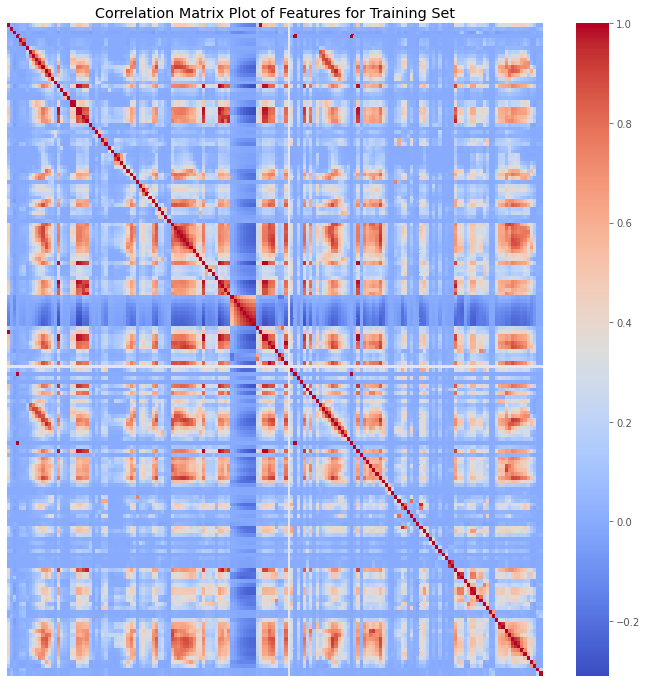

In [49]:
fit, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(data_X.corr(), cmap='coolwarm',xticklabels=False, yticklabels=False, ax=axes)
plt.title("Correlation Matrix Plot of Features for Training Set")
plt.show()

iv. Pick √170 features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

feature number is 13


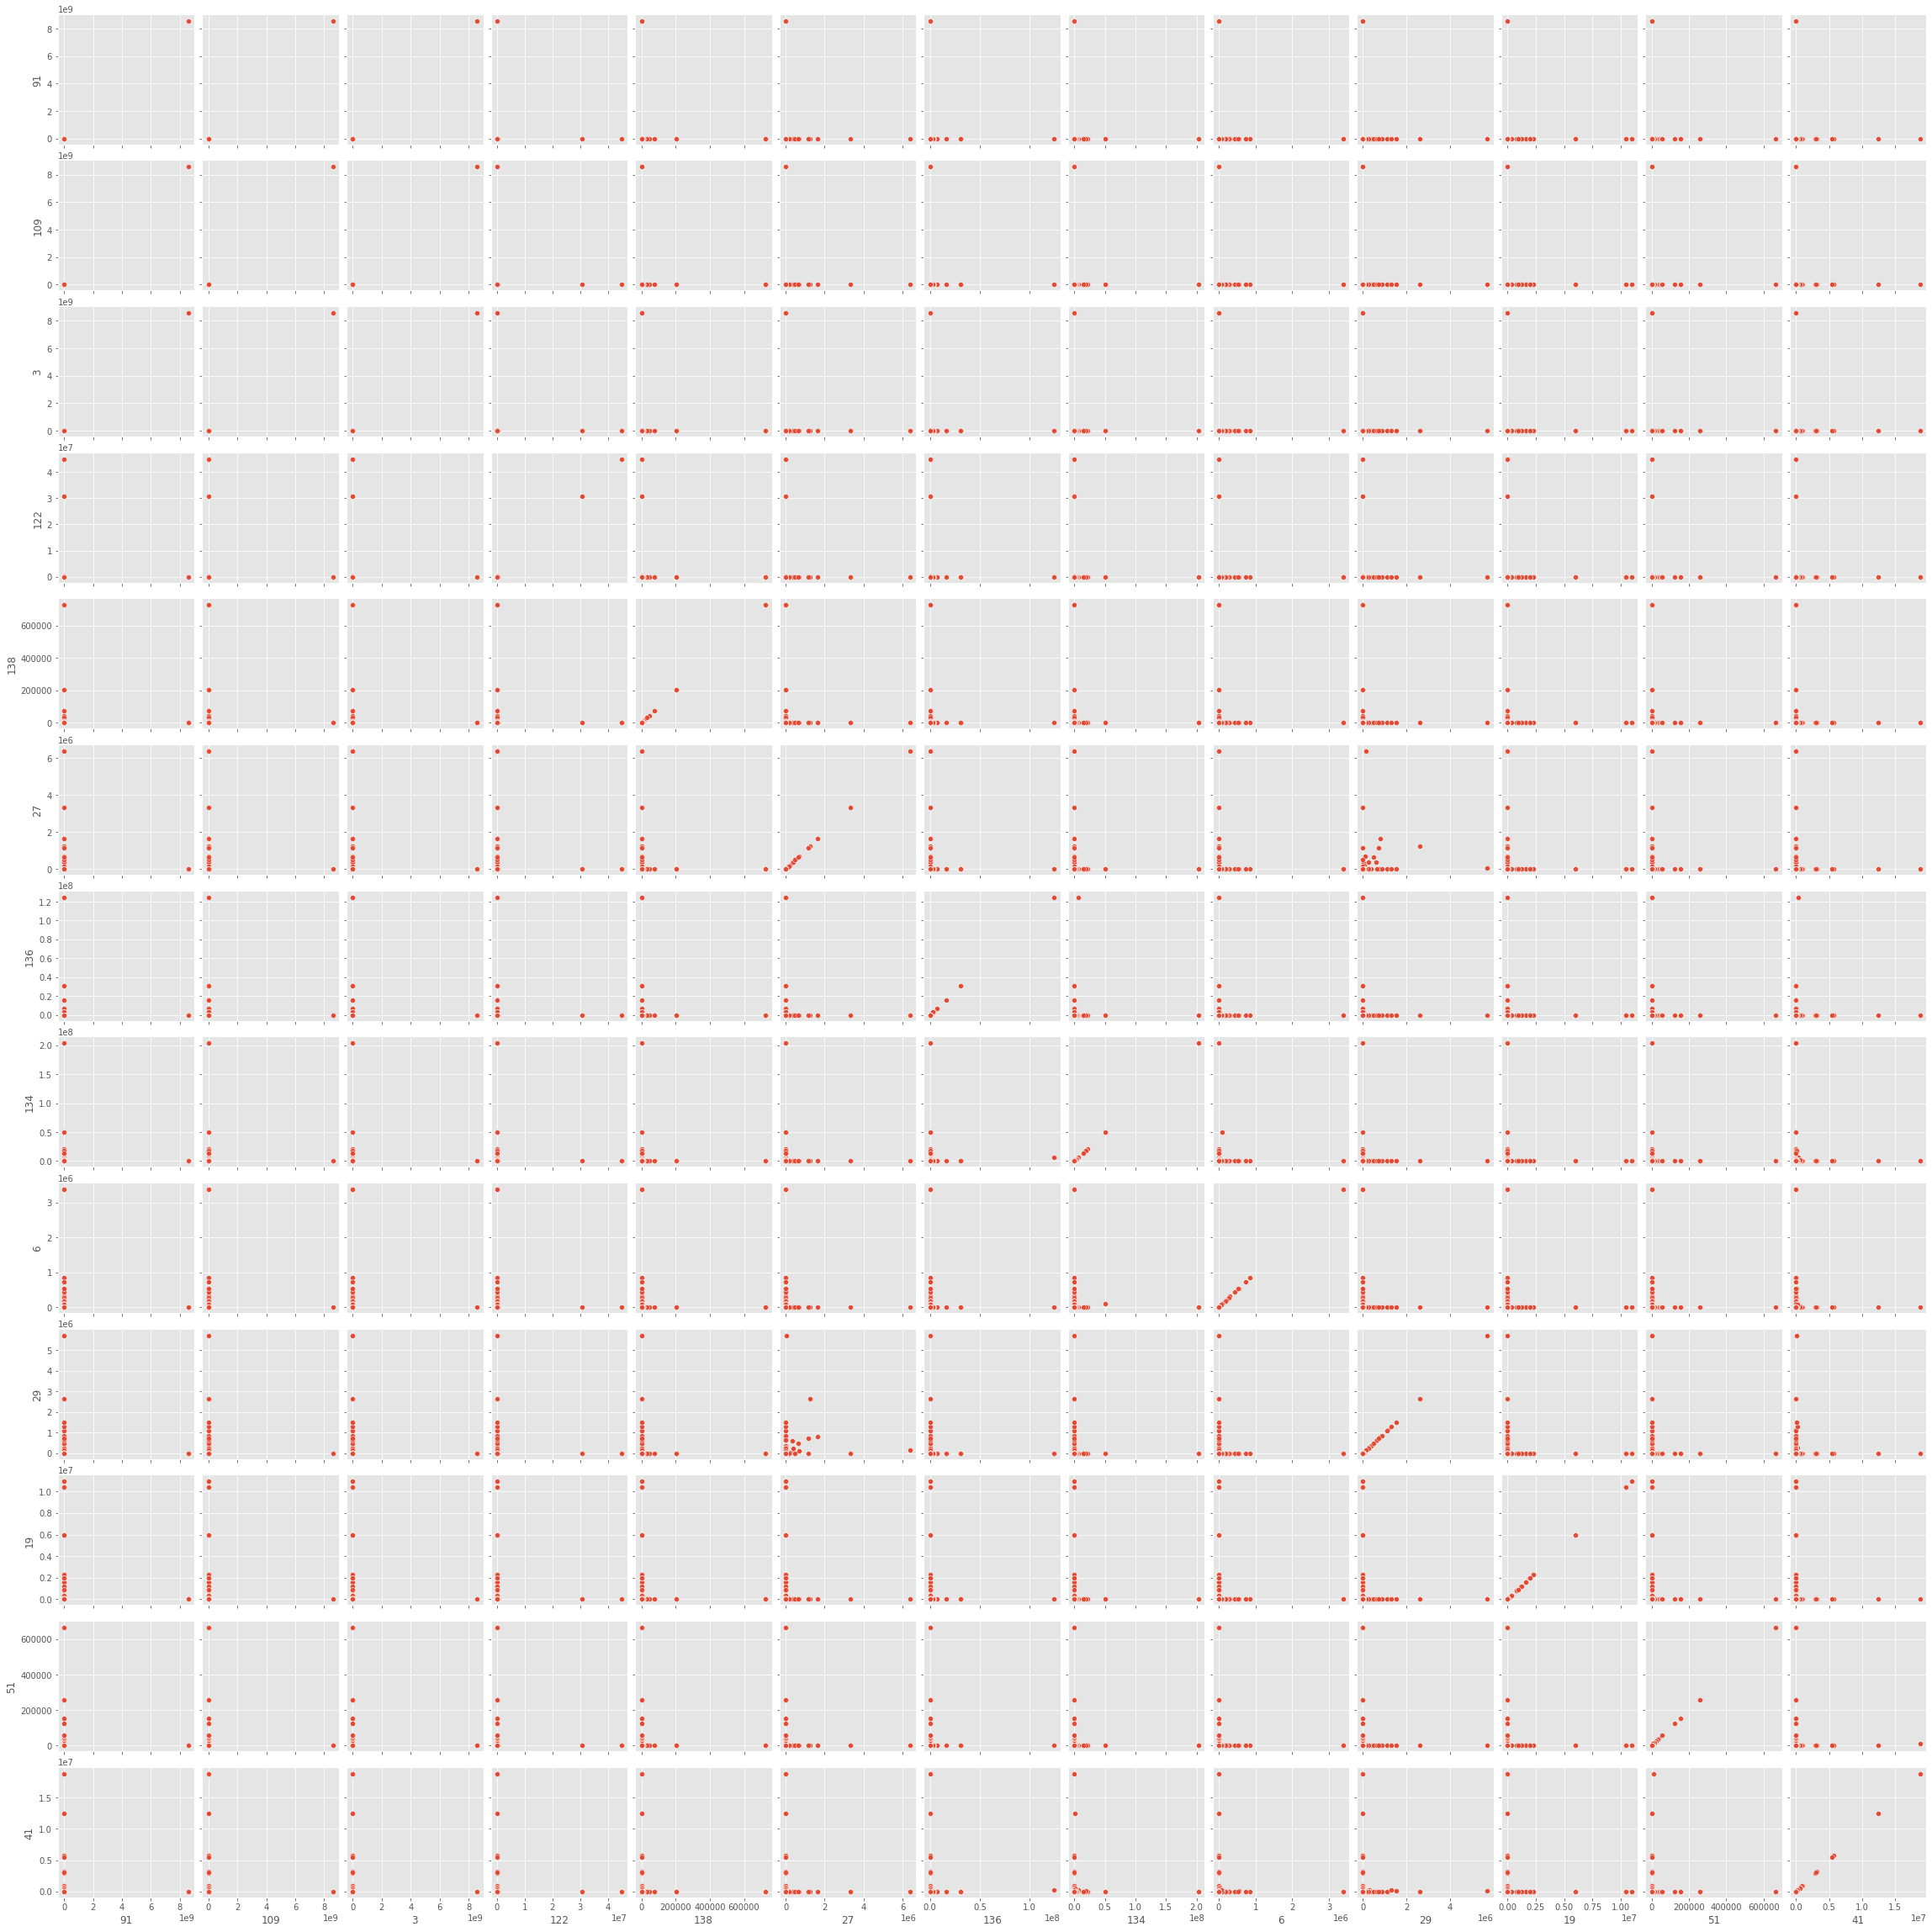

In [51]:
import math

threshold = math.floor(pow(170,0.5))
print('feature number is', threshold)
sorted_var = varation.sort_values('varation', ascending=False)
features = sorted_var[:threshold].T
X = data_X.iloc[:, features.columns]
X

sns.pairplot(X, diag_kind=None)

Most pairs do not show correlation. Hence the problems of multicollinearity are less likely to be posed in this scenario.

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [10]:
print("Positive data count:" ,df['class'].value_counts()[0])
print("Negative data count:" ,df['class'].value_counts()[1])

Positive data count: 74625
Negative data count: 1375


Looking at the counts of positive and negative data, we can infer that the dataset is heavily imbalanced.

(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [11]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

list_train = []
for i in train_Y['class']:
    if i == 'neg':
        list_train.append(0)
    else:
        list_train.append(1)
        
list_test = []
for i in test_Y['class']:
    if i == 'neg':
        list_test.append(0)
    else:
        list_test.append(1)
        
train_Y_a = train_Y
test_Y_a = test_Y

train_Y_a['class_1_0'] = list_train
test_Y_a['class_1_0'] = list_test

train_Y_a.drop('class', axis=1,inplace=True)
test_Y_a.drop('class', axis=1,inplace=True)

In [12]:
#Random Forest on train data
model = RandomForestClassifier(max_depth=3, random_state=10, oob_score=True)
model.fit(train_X, train_Y_a)
Y_pred = model.predict(train_X)
prob = model.predict_proba(train_X)

cf = confusion_matrix(train_Y_a, Y_pred)
print('confusion matrix')
print(cf)

confusion matrix
[[58971    29]
 [  694   306]]


In [13]:
accuracy = accuracy_score(train_Y_a, Y_pred)
print('accuracy score:', accuracy)
print('train misclassification rate:', 1 - accuracy)

accuracy score: 0.98795
train misclassification rate: 0.012050000000000005


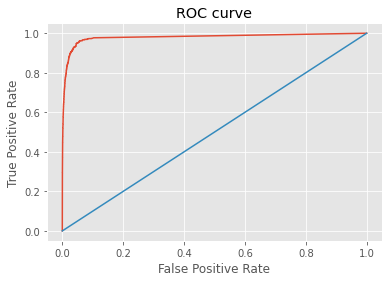

Area under curve (AUC): 0.9798994237288136


In [14]:
FPR, TPR, thresholds = metrics.roc_curve(train_Y_a, prob[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
    
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
    
print('Area under curve (AUC):', AUC)

In [15]:
#Random Forest on test data
Y_pred2 = model.predict(test_X)
prob2 = model.predict_proba(test_X)

cf_test = confusion_matrix(test_Y_a, Y_pred2)
print('confusion matrix')
print(cf_test)

confusion matrix
[[15622     3]
 [  262   113]]


In [16]:
test_accuracy = accuracy_score(test_Y_a, Y_pred2)
print('accuracy score:', test_accuracy)
print('test misclassification rate:', 1 - test_accuracy)

accuracy score: 0.9834375
test misclassification rate: 0.016562500000000036


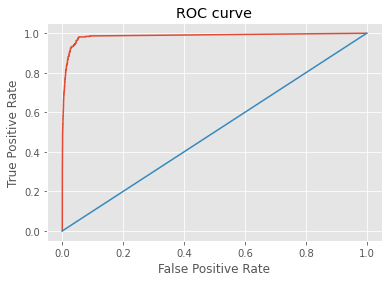

Area under curve (AUC): 0.985780992


In [17]:
FPR, TPR, thresholds = metrics.roc_curve(test_Y_a, prob2[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
    
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print('Area under curve (AUC):', AUC)

In [18]:
print('Out of Bag Error for training data:', 1-model.oob_score_)
print('Test error:', 1- test_accuracy)

Out of Bag Error for training data: 0.012399999999999967
Test error: 0.016562500000000036


(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

1. Bagging for Imbalanced Classification: <br>
a) Standard Bagging <br>
b) Bagging With Random Undersampling <br>
2. Random Forest With Class Weighting: <br> This is done by setting the class_weight argument on the RandomForestClassifier class. Argument value of ‘balanced‘ automatically uses the inverse weighting from the training dataset, giving focus to the minority class. <br>
3. Ensemble for Imbalanced Classification <br>

I'll be using the Random Forest With Class Weighting technique

In [19]:
model_balanced = RandomForestClassifier(max_depth=3, random_state=10, oob_score=True, class_weight = 'balanced')
model_balanced.fit(train_X, train_Y_a)
Y_pred_b = model_balanced.predict(train_X)
prob_b = model_balanced.predict_proba(train_X)

cf_b = confusion_matrix(train_Y_a, Y_pred_b)
print('confusion matrix')
print(cf_b)

confusion matrix
[[55684  3316]
 [   39   961]]


In [20]:
accuracy_b = accuracy_score(train_Y_a, Y_pred_b)
print('accuracy score:', accuracy_b)
print('train misclassification rate:', 1 - accuracy_b)

accuracy score: 0.9440833333333334
train misclassification rate: 0.055916666666666615


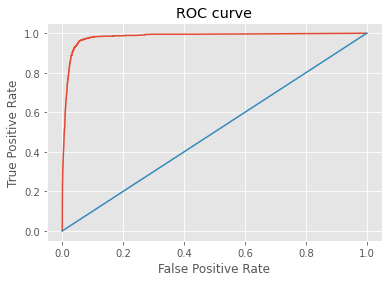

Area under curve (AUC): 0.982215033898305


In [21]:
FPR, TPR, thresholds = metrics.roc_curve(train_Y_a, prob_b[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
    
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
    
print('Area under curve (AUC):', AUC)

In [22]:

Y_pred2_b = model_balanced.predict(test_X)
prob2_b = model_balanced.predict_proba(test_X)

cf_test_b = confusion_matrix(test_Y_a, Y_pred2_b)
print('confusion matrix')
print(cf_test_b)

confusion matrix
[[14782   843]
 [    8   367]]


In [23]:
test_accuracy_b = accuracy_score(test_Y_a, Y_pred2_b)
print('accuracy score:', test_accuracy_b)
print('test misclassification rate:', 1 - test_accuracy_b)

accuracy score: 0.9468125
test misclassification rate: 0.053187500000000054


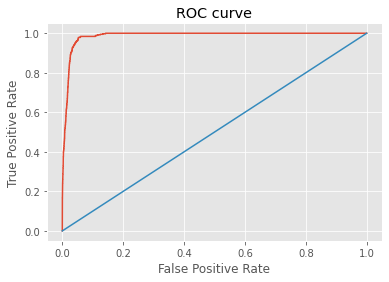

Area under curve (AUC): 0.9864823466666666


In [24]:
FPR, TPR, thresholds = metrics.roc_curve(test_Y_a, prob2_b[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
    
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print('Area under curve (AUC):', AUC)

In [25]:
print('Out of Bag Error for balanced training data:', 1-model_balanced.oob_score_)
print('Test error:', 1- test_accuracy_b)

Out of Bag Error for balanced training data: 0.05631666666666668
Test error: 0.053187500000000054


e. In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has
Pj jXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [26]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from xgboost import XGBClassifier

alpha_list = [10, 5, 1, 0.1, 0.01, 0]
xgboost_cl = XGBClassifier(objective='binary:logistic')
alpha_params = {'reg_alpha': alpha_list}
xgb_cv = GridSearchCV(xgboost_cl, alpha_params, cv=5)
xgb_cv = xgb_cv.fit(train_X, train_Y)
best_alpha_xgb = xgb_cv.best_params_['reg_alpha']

In [27]:
xgb_clf = XGBClassifier(objective='binary:logistic', reg_alpha=best_alpha_xgb)
xgb_clf = xgb_clf.fit(train_X, train_Y)

In [28]:
from sklearn import metrics

Y_pred_xgb = xgb_clf.predict(train_X)
MSE_xgb = metrics.mean_squared_error(train_Y, Y_pred_xgb)

print('Best alpha value obtained from cross validation:', best_alpha_xgb)
print('mean square error:', MSE_xgb)

Best alpha value obtained from cross validation: 0.1
mean square error: 0.004433333333333333


In [29]:
cf_xgb = confusion_matrix(np.array(train_Y).flatten(), Y_pred_xgb)
print('confusion matrix:')
print(cf_xgb)

prob_train_xgb = xgb_clf.predict_proba(train_X)
accuracy_xgb = accuracy_score(train_Y, Y_pred_xgb)
print('accuracy score:', accuracy_xgb)

print('train misclassification rate:', 1- accuracy_xgb)

confusion matrix:
[[58959    41]
 [  225   775]]
accuracy score: 0.9955666666666667
train misclassification rate: 0.004433333333333289


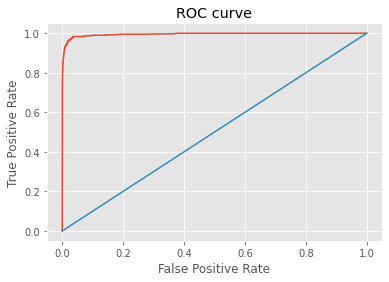

Area under curve (AUC): 0.9952361694915255


In [30]:
FPR, TPR, thresholds = metrics.roc_curve(train_Y_a, prob_train_xgb[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
    
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print('Area under curve (AUC):', AUC)

In [31]:
#Test data
Y_pred_test_xgb = xgb_clf.predict(test_X)
MSE_xgb_test = metrics.mean_squared_error(test_Y, Y_pred_test_xgb)

print('mean square error:',MSE_xgb_test)

mean square error: 0.00825


In [32]:
cf_xgb_test = confusion_matrix(np.array(test_Y).flatten(), Y_pred_test_xgb)
print('confusion matrix:')
print(cf_xgb_test)

prob_test_xgb = xgb_clf.predict_proba(test_X)
accuracy_xgb_test = accuracy_score(test_Y, Y_pred_test_xgb)
print('accuracy score:', accuracy_xgb_test)

print('test misclassification rate:', 1- accuracy_xgb_test)

confusion matrix:
[[15607    18]
 [  114   261]]
accuracy score: 0.99175
test misclassification rate: 0.00824999999999998


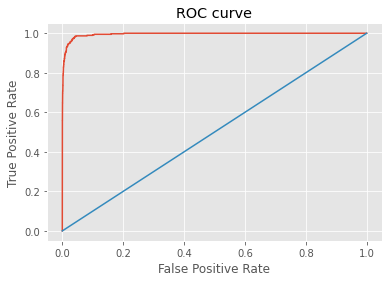

Area under curve (AUC): 0.9953565013333333


In [33]:
FPR, TPR, thresholds = metrics.roc_curve(test_Y_a, prob_test_xgb[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
    
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print('Area under curve (AUC):', AUC)

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBoost with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
sm_train_X, sm_train_Y = smote.fit_resample(train_X, train_Y)
sm_train_Y.class_1_0.value_counts()

0    59000
1    59000
Name: class_1_0, dtype: int64

In [35]:
xgb_cl_sm = XGBClassifier(objective='binary:logistic')
alpha_params = {'reg_alpha': alpha_list}
xgb_cv_sm = GridSearchCV(xgb_cl_sm, alpha_params, cv=5)
xgb_cv_sm = xgb_cv_sm.fit(sm_train_X, sm_train_Y)
best_alpha_xgb_sm = xgb_cv_sm.best_params_['reg_alpha']

In [36]:
xgb_clf_sm = XGBClassifier(objective='binary:logistic', reg_alpha=best_alpha_xgb_sm)
xgbModel_clf_sm = xgb_clf_sm.fit(sm_train_X, sm_train_Y)

In [37]:
Y_pred_xgb_sm = xgb_clf.predict(sm_train_X)
MSE_xgb_sm = metrics.mean_squared_error(sm_train_Y, Y_pred_xgb_sm)

print('Best alpha value obtained from cross validation:', best_alpha_xgb_sm)
print('mean square error:', MSE_xgb_sm)

Best alpha value obtained from cross validation: 0.1
mean square error: 0.10491525423728813


In [38]:
cf_xgb_sm = confusion_matrix(np.array(sm_train_Y).flatten(), Y_pred_xgb_sm)
print('confusion matrix:')
print(cf_xgb_sm)

prob_train_xgb_sm = xgb_clf.predict_proba(sm_train_X)
accuracy_xgb_sm = accuracy_score(sm_train_Y, Y_pred_xgb_sm)
print('accuracy score:', accuracy_xgb_sm)

print('train misclassification rate:', 1- accuracy_xgb_sm)

confusion matrix:
[[58959    41]
 [12339 46661]]
accuracy score: 0.8950847457627119
train misclassification rate: 0.10491525423728809


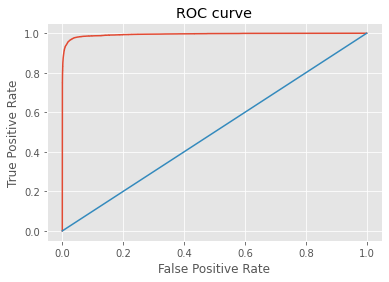

Area under curve (AUC): 0.9942660929330653


In [39]:
FPR, TPR, thresholds = metrics.roc_curve(sm_train_Y, prob_train_xgb_sm[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
    
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print('Area under curve (AUC):', AUC)

In [40]:
#Test data
Y_pred_test_xgb_sm = xgb_clf_sm.predict(test_X)
MSE_xgb_sm_test = metrics.mean_squared_error(test_Y, Y_pred_test_xgb_sm)

print('mean square error:',MSE_xgb_sm_test)

mean square error: 0.0315


In [41]:
cf_xgb_sm_test = confusion_matrix(np.array(test_Y).flatten(), Y_pred_test_xgb_sm)
print('confusion matrix:')
print(cf_xgb_sm_test)

prob_test_xgb_sm = xgb_clf_sm.predict_proba(test_X)
accuracy_xgb_sm_test = accuracy_score(test_Y, Y_pred_test_xgb_sm)
print('accuracy score:', accuracy_xgb_sm_test)

print('test misclassification rate:', 1- accuracy_xgb_sm_test)

confusion matrix:
[[15145   480]
 [   24   351]]
accuracy score: 0.9685
test misclassification rate: 0.03149999999999997


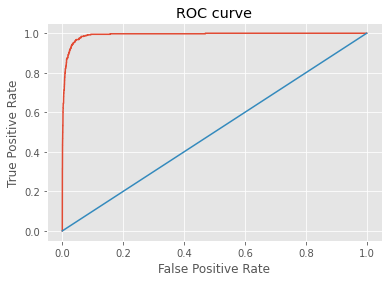

Area under curve (AUC): 0.9915188906666667


In [42]:
FPR, TPR, thresholds = metrics.roc_curve(test_Y_a, prob_test_xgb_sm[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
    
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print('Area under curve (AUC):', AUC)

> **ISLR 6.6.3**

(a) As we increase s from 0, the training RSS will: <br> <br>

iv: Steadily decrease <br>
As we will see overfillting with increasing s and increasing flexibility in the model, which will lead to a decrease in training RSS

(b) Repeat (a) for test RSS. <br> <br>
ii. Decrease initially, and then eventually start increasing in a U shape. <br>
The model will improve and show good performance initially with increased flexibility due to increased s, but will start overfitting the data and the test RSS will eventually take a U shape

(c) Repeat (a) for variance. <br><br>
iii. Steadily increase. <br>
Increasing s means increasing flexibility, which increases variance as well

(d) Repeat (a) for (squared) bias. <br> <br>
iv. Steadily decrease <br>
Increasing s means increasing flexibility, which increases variance and decreases bias steadily

(e) Repeat (a) for the irreducible error <br><br>
v. Remain constant <br>
The irreducible error remains constant regardless of the flexibility in the model as it corresponds to the noise in our data which can be random

> **ISLR 6.6.5**

(a) Write out the ridge regression optimization problem in this setting. <br>

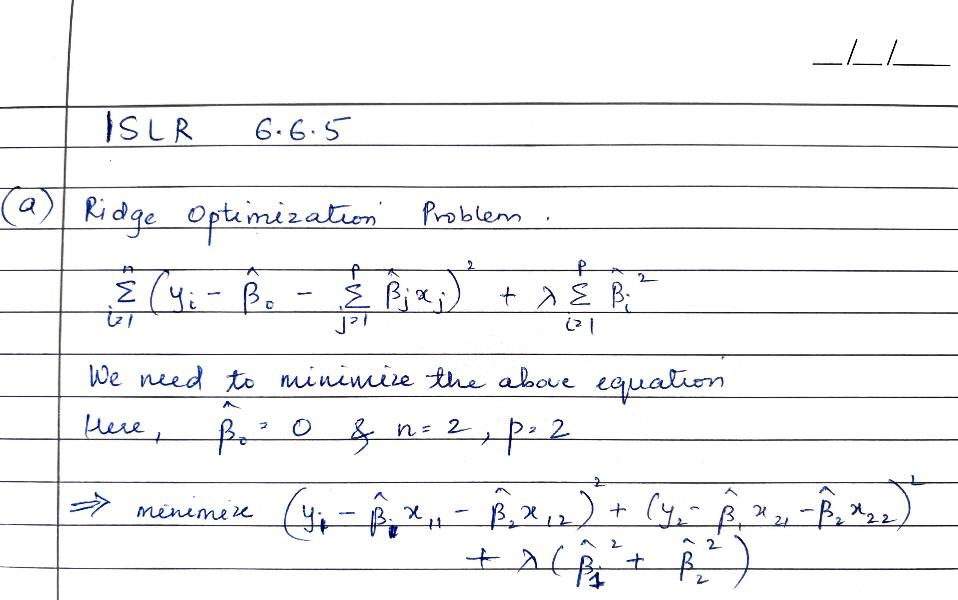

(b) Argue that in this setting, the ridge coefficient estimates satisfy ˆ β1 = ˆ β2. <br>

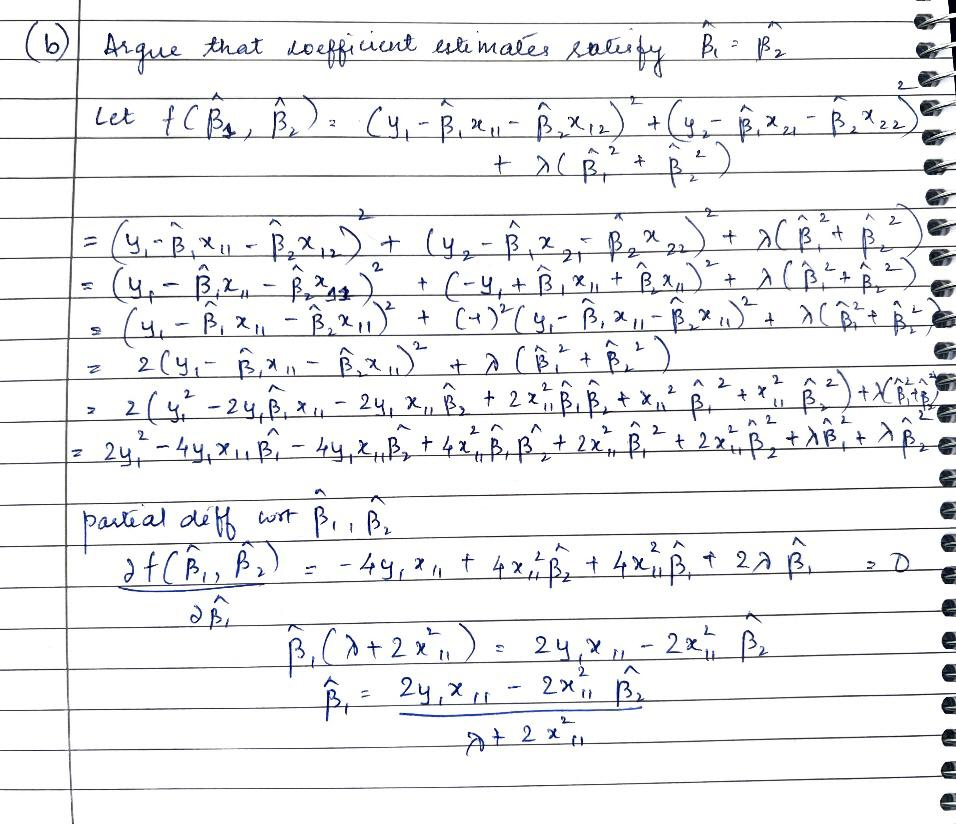

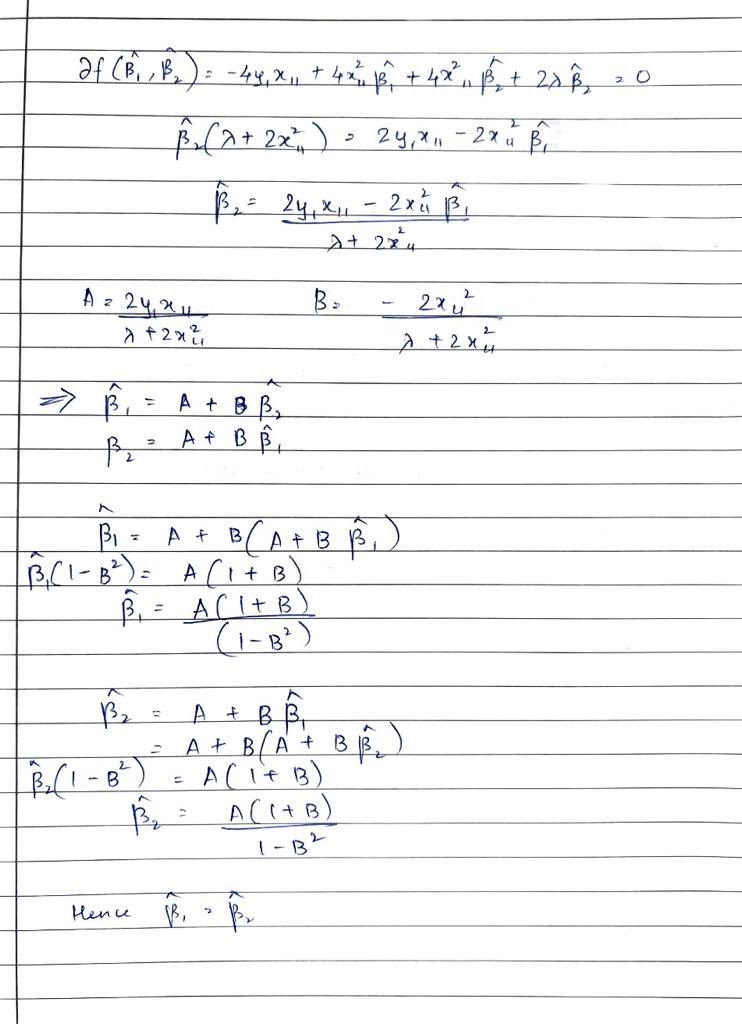

(c) Write out the lasso optimization problem in this setting. <br>

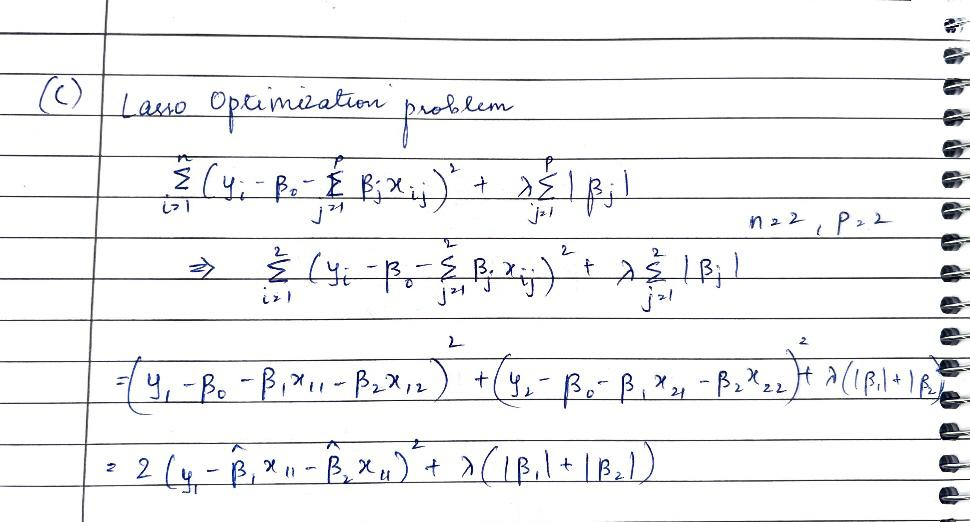

(d) Argue that in this setting, the lasso coefficients ˆ β1 and ˆ β2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions. <br>

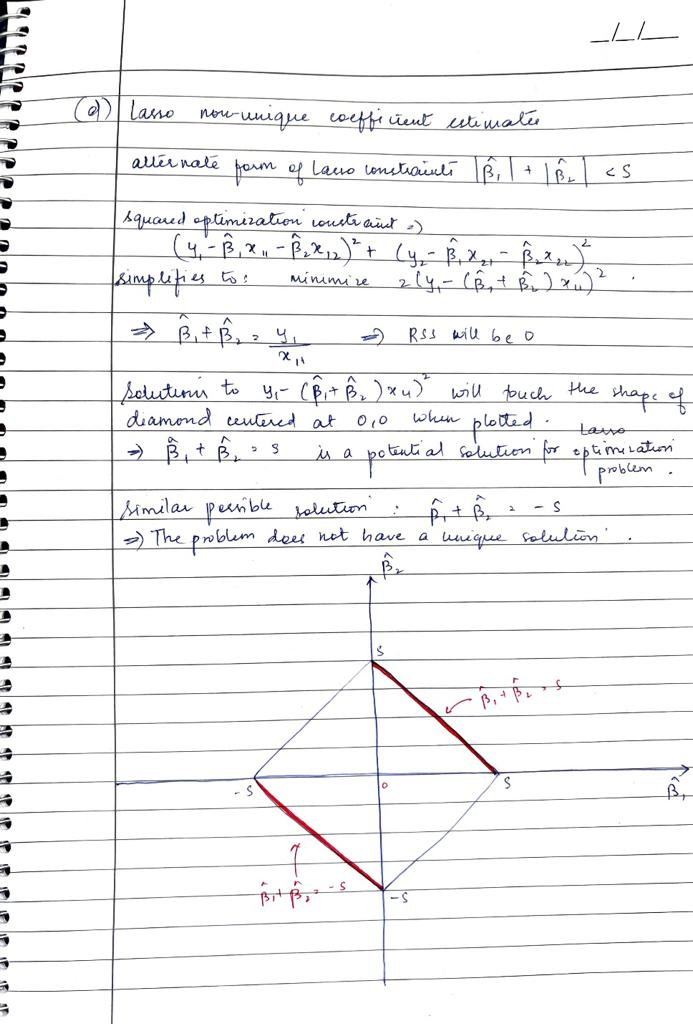

> **ISLR 8.4.5**

Approach 1: majority vote <br>
Assuming threshold = 0.5, class will be RED as most of the extimates are >0.5 <br>

Approach 2: Classification based on average probabiliy <br>
The average probability is 0.45, so the class will be green

> **ISLR 9.7.3**

a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

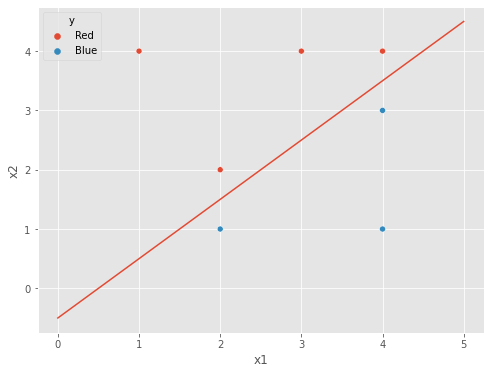

In [5]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

plt.figure(figsize=(8,6))
a = sns.scatterplot(x='x1', y='x2', hue='y', data=df)
a.plot(X1, X2)

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane: <br>

equation: X2 = X1 - 0.5

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 +β1X1 +β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2. <br>

classify to Blue if: X1 - X2 - 0.5 > 0 <br>
classify to Red if: X1 - X2 - 0.5 <= 0

(d) On your sketch, indicate the margin for the maximal margin hyperplane.

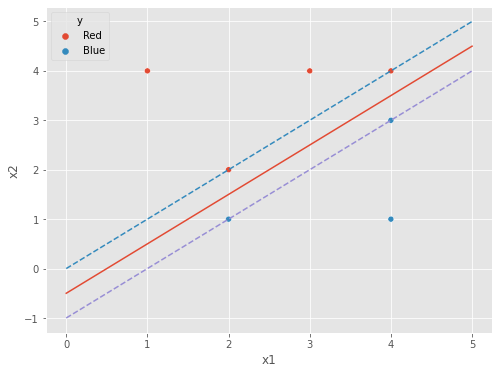

In [7]:
upper_margin = X1
lower_margin = X1 -1

plt.figure(figsize=(8,6))
a = sns.scatterplot(x='x1', y='x2', hue='y', data=df)
a.plot(X1, X2)
a.plot(X1, upper_margin, linestyle='--')
a.plot(X1, lower_margin, linestyle='--')

(e) Indicate the support vectors for the maximal margin classifier.<br>
Observations that lie on the dashed line are the support vectors

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane

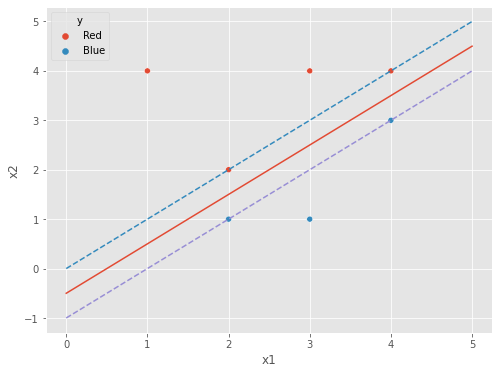

In [10]:
x1 = [3, 2, 4, 1, 2, 4, 3]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

upper_margin = X1
lower_margin = X1 -1

plt.figure(figsize=(8,6))
a = sns.scatterplot(x='x1', y='x2', hue='y', data=df)
a.plot(X1, X2)
a.plot(X1, upper_margin, linestyle='--')
a.plot(X1, lower_margin, linestyle='--')

On decreasing the 7th observation in x1 by 1, the maximal margin hyperplane remains unaffected as this point does not lie on margins. But if the 7th value is increased or decreased by a bigger number, the point enters te margin, thus affecting the hyperplane

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane

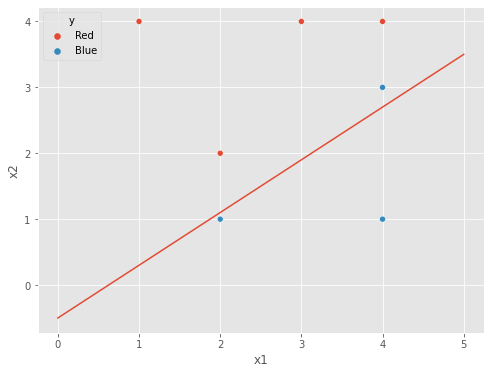

In [14]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

X1 = np.linspace(0, 5, 10)
X2 = 0.8*X1 - 0.5
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

plt.figure(figsize=(8,6))
a = sns.scatterplot(x='x1', y='x2', hue='y', data=df)
a.plot(X1, X2)

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

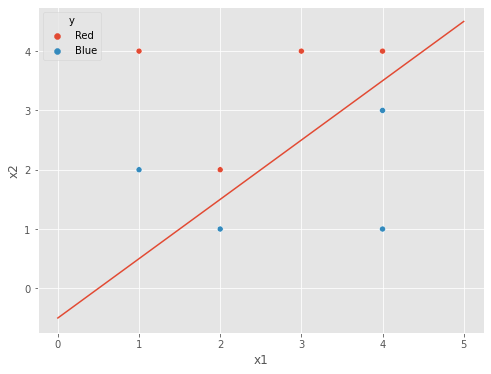

In [19]:
x1 = [3, 2, 4, 1, 2, 4, 4, 1]
x2 = [4, 2, 4, 4, 1, 3, 1, 2]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue']

X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

plt.figure(figsize=(8,6))
a = sns.scatterplot(x='x1', y='x2', hue='y', data=df)
a.plot(X1, X2)